##**Pythonで視覚化③：Titanic(seaborn) :binary**
Pythonで視覚化③ で使用するデータセットは、視覚化ライブラリ「seaborn」で用意されているデータセットリストにある [Titanic] データセットです。

###**このデータセットについて**
[Titanic] データセットは、「1912年に北大西洋で氷山に衝突して沈没したタイタニック号への乗客者の生存状況」に関するデータです。
このデータセットは、機械学習の初心者向けチュートリアルとして活用されることが多く、Kaggle（100万人以上が利用している世界最大のデータサイエンスコンペティションプラットフォーム）の初心者チュートリアルのデータセットでもあります。

seabornデータセットリストにある [Titanic]データセットは、一部のデータ項目名・クラス名がわかりやすい表記に変更され、オリジナルデータにないデータ項目が追加されています。（乗船デッキ）
本書では、seaborn版[Titanic]データセットの一部をカット（重複項目）した以下のデータを使用します。

- **データ項目（特徴量）**
 - sex（性別：male、female）
 - age（年齢）
 - sibsp（同乗している兄弟/配偶者の数）
 - parch（タイタニックに同乗している親/子供の数）
 - fare（乗船料金）
 - class（乗船クラス：First、Second、Third）
 - deck（乗船デッキ）
 - embark_town（出港地：Cherbourg、Queenstown、Southampton）
 - alone（一人で乗船したかどうか）

- **ターゲット（目的変数）**
 - alive（生存状況：yes、no）

### **手順**
- 「1．インストール」の「▷」をクリックしてください。（インストールが実行されます）。
- Select_Datasetのドロップダウンメニュー(dataset:)で[Titanic(seaborn) :binary]を選択してください。
- Load dataset の「▷」をクリックしてください。（データセットが読み込まれます）。

## **1．インストール**

In [1]:
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install seaborn==0.11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [3]:
!pip install seaborn-analyzer==0.2.13

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.0 MB/s eta 0:00:00


In [4]:
!pip install pandas-bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **2．データセット読込み**

In [5]:
#@title Select_Dataset { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：かならず 実行する前に 設定してください。**</font>

dataset = 'Titanic(seaborn) :binary' #@param ['Boston_housing :regression', 'Diabetes :regression', 'Breast_cancer :binary','Titanic :binary', 'Titanic(seaborn) :binary', 'Iris :classification', 'Loan_prediction :binary','wine :classification', 'Occupancy_detection :binary', 'Upload']

In [6]:
#@title Load dataset

#ライブラリインポート
#import numpy as np    #数値計算ライブラリ
import pandas as pd   #データを効率的に扱うライブラリ
import seaborn as sns #視覚化ライブラリ
import warnings       #警告を表示させないライブラリ
warnings.simplefilter('ignore')

'''
dataset（ドロップダウンメニュー）で選択したデータセットを読込み、データフレーム（df）に格納。
目的変数は、データフレームの最終列とし、FEATURES、TARGET、X、yを指定した後、データフレーム
に関する情報と先頭5列を表示。
任意のcsvデータを読込む場合は、datasetで'Upload'を選択。

'''

#任意のcsvデータ読込み及びデータフレーム格納、
if dataset =='Upload':
  from google.colab import files
  uploaded = files.upload()#Upload
  target = list(uploaded.keys())[0]
  df = pd.read_csv(target)

#Diabetes データセットの読込み及びデータフレーム格納、
elif dataset == "Diabetes :regression":
  from sklearn.datasets import load_diabetes
  diabetes = load_diabetes()
  df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
  df['target'] = diabetes.target

#Breast_cancer データセットの読込み及びデータフレーム格納、
elif dataset == "Breast_cancer :binary":
  from sklearn.datasets import load_breast_cancer
  breast_cancer = load_breast_cancer()
  df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
  #df['target'] = breast_cancer.target  #目的変数をカテゴリー数値とする時
  df['target'] = breast_cancer.target_names[breast_cancer.target]

#Titanic データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic :binary":
  data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
  df = pd.read_csv(data_url)
  #目的変数 Survived をデータフレーム最終列に移動
  X = df.drop(['Survived'], axis=1)
  y = df['Survived']
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#Titanic(seaborn) データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic(seaborn) :binary":
  df = sns.load_dataset('titanic')
  #重複データをカットし、目的変数 alive をデータフレーム最終列に移動
  X = df.drop(['survived','pclass','embarked','who','adult_male','alive'], axis=1)
  y = df['alive']                   #目的変数データ
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#iris データセットの読込み及びデータフレーム格納、
elif dataset == "Iris :classification":
  from sklearn.datasets import load_iris
  iris = load_iris()
  df = pd.DataFrame(iris.data, columns = iris.feature_names)
  #df['target'] = iris.target  #目的変数をカテゴリー数値とする時
  df['target'] = iris.target_names[iris.target]

#wine データセットの読込み及びデータフレーム格納、
elif dataset == "wine :classification":
  from sklearn.datasets import load_wine
  wine = load_wine()
  df = pd.DataFrame(wine.data, columns = wine.feature_names)
  #df['target'] = wine.target  #目的変数をカテゴリー数値とする時
  df['target'] = wine.target_names[wine.target]

#Loan_prediction データセットの読込み及びデータフレーム格納、
elif dataset == "Loan_prediction :binary":
  data_url = "https://github.com/shrikant-temburwar/Loan-Prediction-Dataset/raw/master/train.csv"
  df = pd.read_csv(data_url)

#Occupancy_detection データセットの読込み及びデータフレーム格納、
elif dataset =='Occupancy_detection :binary':
  data_url = 'https://raw.githubusercontent.com/hima2b4/Auto_Profiling/main/Occupancy-detection-datatest.csv'
  df = pd.read_csv(data_url)
  df['date'] = pd.to_datetime(df['date'])    #[date]のデータ型をdatetime型に変更

#Boston データセットの読込み及びデータフレーム格納
else:
  from sklearn.datasets import load_boston
  boston = load_boston()
  df = pd.DataFrame(boston.data, columns = boston.feature_names)
  df['target'] = boston.target

#FEATURES、TARGET、X、yを指定
FEATURES = df.columns[:-1]    #説明変数のデータ項目を指定
TARGET = df.columns[-1]       #目的変数のデータ項目を指定
X = df.loc[:, FEATURES]       #FEATURESのすべてのデータをXに格納
y = df.loc[:, TARGET]         #TARGETのすべてのデータをyに格納

#データフレーム表示
df.info(verbose=True)         #データフレーム情報表示（verbose=Trueで表示数制限カット）
df.head()                     #データフレーム先頭5行表示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   age          714 non-null    float64 
 2   sibsp        891 non-null    int64   
 3   parch        891 non-null    int64   
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   deck         203 non-null    category
 7   embark_town  889 non-null    object  
 8   alone        891 non-null    bool    
 9   alive        891 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(2), object(3)
memory usage: 51.9+ KB


,sex,age,sibsp,parch,fare,class,deck,embark_town,alone,alive
0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False,no
1,female,38.0,1,0,71.2833,First,C,Cherbourg,False,yes
2,female,26.0,0,0,7.9250,Third,NaN,Southampton,True,yes
3,female,35.0,1,0,53.1000,First,C,Southampton,False,yes
4,male,35.0,0,0,8.0500,Third,NaN,Southampton,True,no


### **Pairplot**

<Figure size 640x480 with 0 Axes>

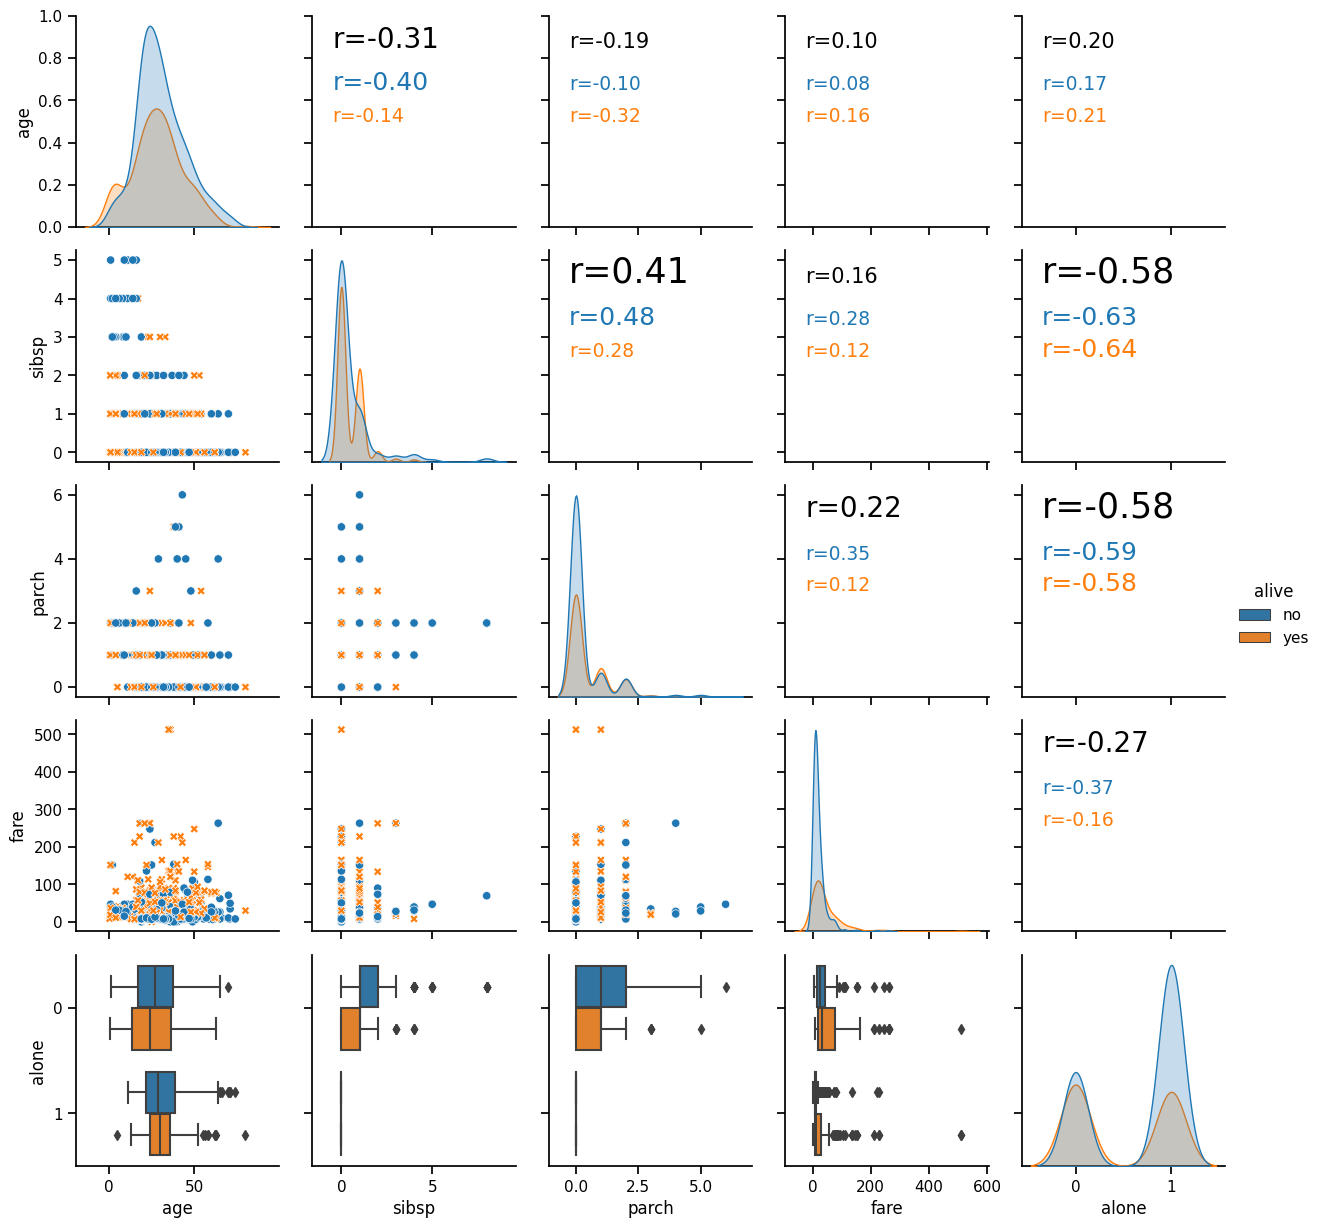

In [7]:
#@title Pairplot_classification

from seaborn_analyzer import CustomPairPlot

cp = CustomPairPlot()
cp.pairanalyzer(df, hue=TARGET)

In [ ]:
#@title **データ項目一覧**
#@markdown **※データ項目一覧を表示します。以後のデータ項目の入力は、表示された項目をコピーアンドペーストすると確実です。**
print('データ項目名：',df.columns.values)

## **3．視覚化**

### **棒グラフ**

In [ ]:
#@title bar-plot_seaborn
Column_name =  'xxx'#@param {type:"raw"}
Category_column_name =  'xxx'#@param {type:"raw"}

import seaborn as sns

sns.set_style('whitegrid') #style指定
sns.countplot(x=Column_name, hue=Category_column_name,data=df);

In [ ]:
#@title bar-plot_seaborn
Column_name =  'xxx'#@param {type:"raw"}
Category_column_name =  'xxx'#@param {type:"raw"}

import seaborn as sns

sns.set_style('whitegrid') #style指定
sns.countplot(x=Column_name, hue=Category_column_name,data=df);

### **class_separator_plot**

In [ ]:
#@title class_separator_plot_plotnine

X_column_name = 'xxx'#@param {type:"raw"}
y_column_name = 'xxx'#@param {type: "raw"}
Stratified_column_name =  'xxx'#@param {type:"raw"}
facet = 'xxx~xxx'#@param {type: "raw"}

from plotnine import *
(
    ggplot(df)
#    + facet_grid(facets  ="sex~alone")
    + facet_grid(facets = facet) #facetは 'sex~class'のように記述
    + aes(x= X_column_name, y= y_column_name, color=Stratified_column_name)
    + labs(
        x= X_column_name,
        y= y_column_name,
        title="Class separator plot",
    )
    + geom_point()
)